In [135]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
import time
import scipy.cluster.hierarchy as sch
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import OneHotEncoder
import unicodedata

# Specifying figure layout
%matplotlib inline
plt.style.use('fivethirtyeight')
sns.set_color_codes('bright')
plot_kwds = {'alpha' : 0.25, 's' : 80, 'linewidths':0}
plt.rcParams["figure.figsize"] = (15, 10)

In [145]:
# Load data
df = pd.read_csv('../../data/processed/cluster_model_train.csv')

In [150]:
model_array = df.to_numpy()

In [ ]:
# # defining a utility function for testing the clustering algorithms
# def plot_clusters(data, algorithm, kwds):
#     # cluster the data while taking the time the process needs 
#     start_time = time.time()
#     labels = algorithm(**kwds).fit_predict(data)
#     end_time = time.time()
    
#     # defining the colors for visual representation
#     palette = sns.color_palette('bright', np.unique(labels).max() + 1)
#     colors = [palette[x] if x >= 0 else (0.0, 0.0, 0.0) for x in labels]
    
#     # plotting the data, removing the axis and adding title and time 
#     plt.scatter(data.T[0], data.T[1], c=colors, **plot_kwds)
#     frame = plt.gca()
#     frame.axes.get_xaxis().set_visible(False)
#     frame.axes.get_yaxis().set_visible(False)
#     plt.title('Clusters found by {}'.format(str(algorithm.__name__)), fontsize=24)
#     plt.text(-0.5, 0.7, 'Clustering took {:.2f} s'.format(end_time - start_time), fontsize=14)

In [162]:
from sklearn.decomposition import PCA
# Initialize PCA
pca = PCA(n_components=2)

# Apply PCA
pca_result = pca.fit_transform(model_array)

# Create a DataFrame with PCA results
pca_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])

# Check explained variance
print("Explained variance ratio:", pca.explained_variance_ratio_)

Explained variance ratio: [0.37271967 0.20982541]


In [163]:
# Initialize KMeans with desired number of clusters (e.g., 3)
kmeans = KMeans(n_clusters=3, random_state=42)

# Fit KMeans on PCA-reduced data
kmeans.fit(pca_df)

# Get cluster labels
pca_df['Cluster'] = kmeans.labels_


d:\DS\ml-pueblos\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


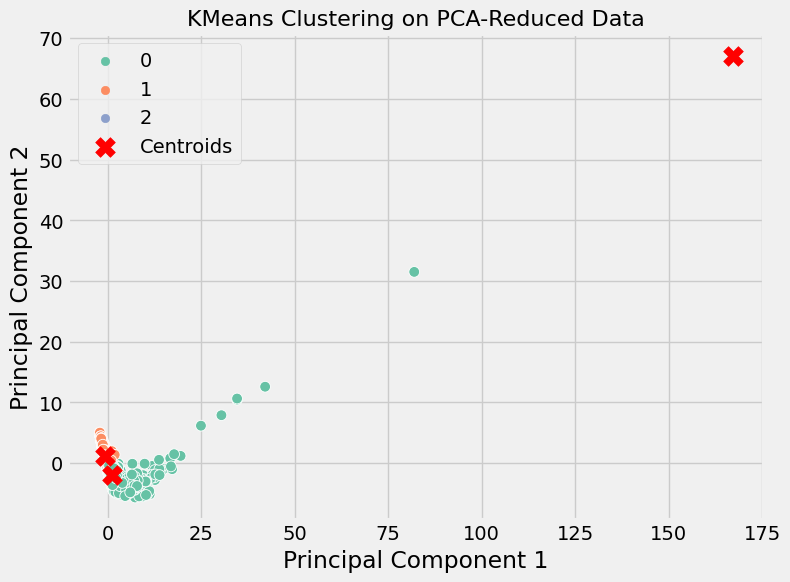

In [164]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=pca_df, palette='Set2', s=60)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            s=200, c='red', label='Centroids', marker='X')
plt.title('KMeans Clustering on PCA-Reduced Data', fontsize=16)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()


In [ ]:
# Initialize KMeans with desired number of clusters (e.g., 3)
agg_cluster = AgglomerativeClustering(n_clusters= 6, linkage='ward')

# Fit KMeans on PCA-reduced data
agg_cluster.fit_predict(model_array)


AgglomerativeClustering(n_clusters=6)

In [ ]:


plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=model_array, palette='Set2', s=60)
plt.scatter(agg_cluster.cluster_centers_[:, 0], agg_cluster.cluster_centers_[:, 1], 
            s=200, c='red', label='Centroids', marker='X')
plt.title('KMeans Clustering on PCA-Reduced Data', fontsize=16)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()


ValueError: Could not interpret value `PC1` for parameter `x`

<Figure size 800x600 with 0 Axes>

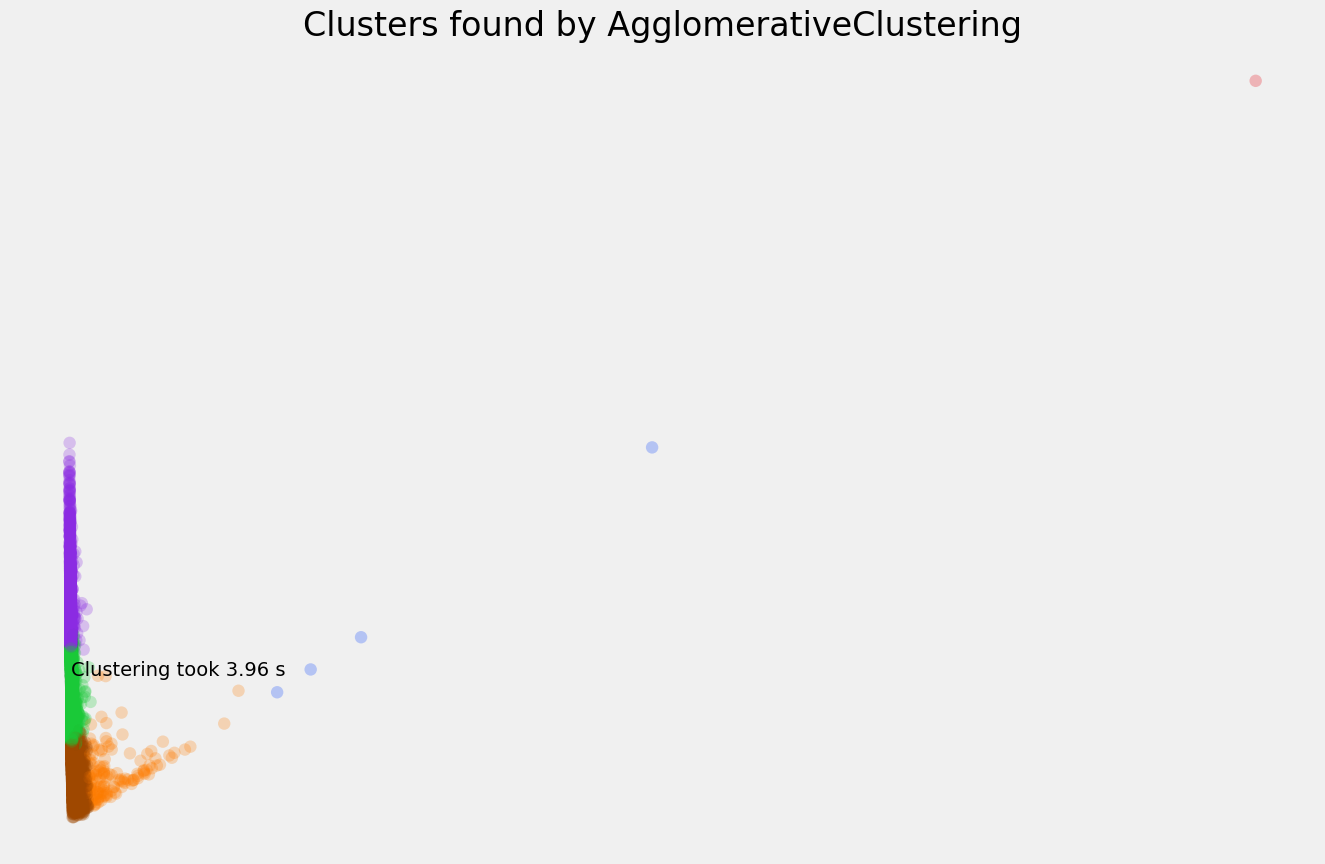

In [131]:
plot_clusters(array, AgglomerativeClustering, {'n_clusters':6, 'linkage':'ward'})

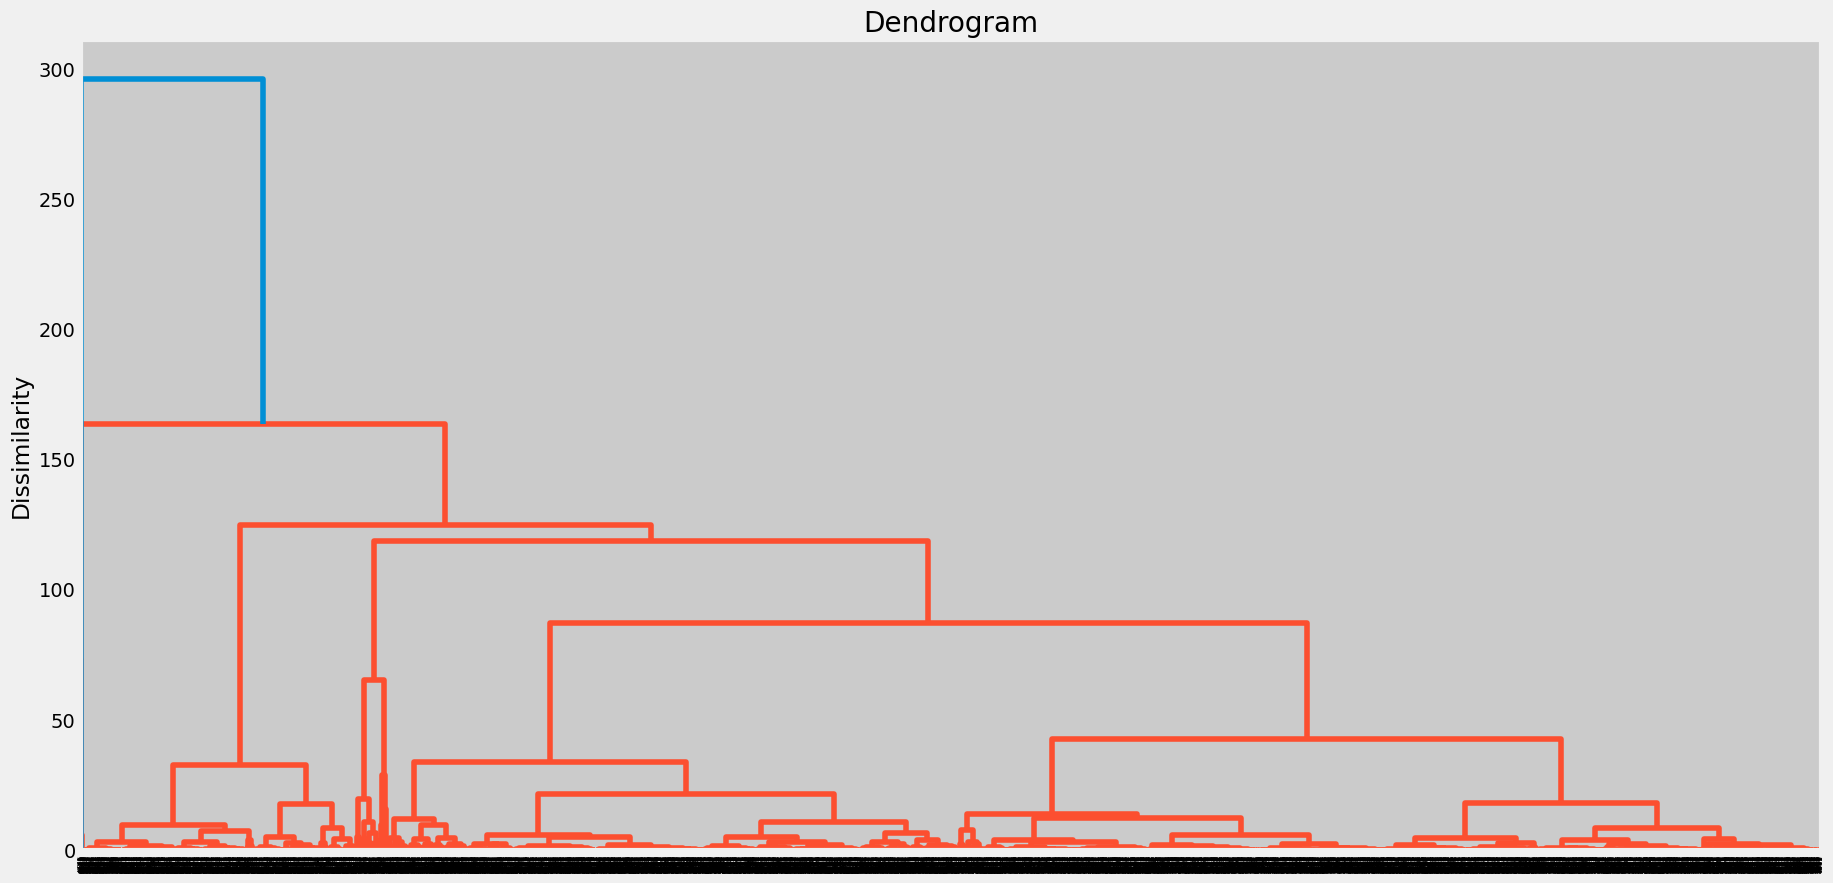

In [133]:
# Plotting the dendrogram of our data
plt.figure(figsize=(20, 10))
plt.title('Dendrogram')
plt.ylabel('Dissimilarity')
plt.grid(True)
dendrogram = sch.dendrogram(sch.linkage(array, method = 'ward'))
plt.show()

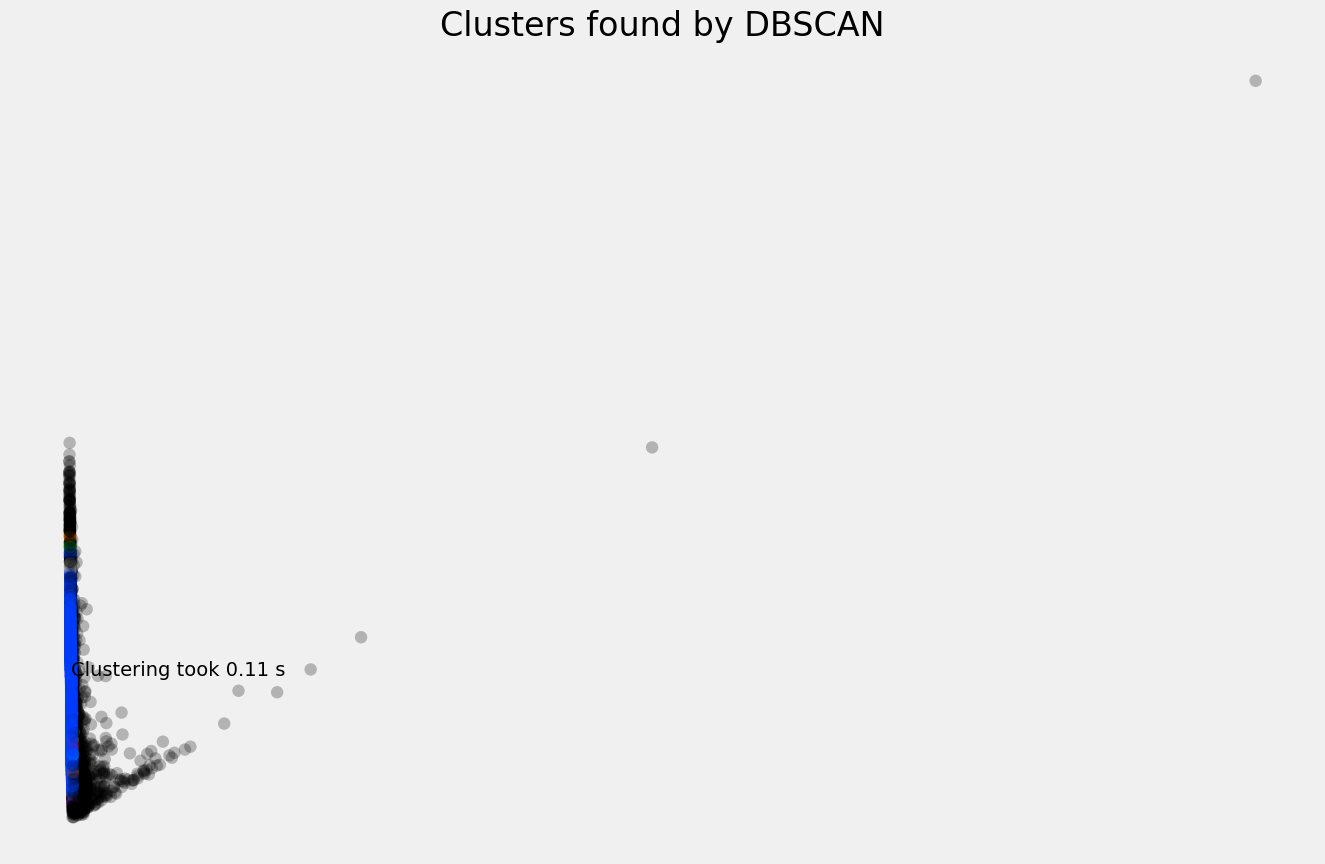

In [132]:
plot_clusters(array, DBSCAN, {'eps':0.025, 'min_samples':7})